In [2]:
import numpy as np
from matplotlib import pylab as plt

# Nearest neighbor classification

The nearest neighbor classifier is one of the simplest machine learning methods available.
Here's the simplest version of it:

```
Nearest neighbor classifier

- Find the example in the training data that is closest to
  the example that needs to be classified.
- Return its label.
```

And the code:

In [3]:
def distance(x1, x2):
    return np.linalg.norm(x1-x2)

class nearest_neighbor:
    def __init__(self):
        pass
    def fit(self, X, y):
        self.X = X
        self.y = y
    def get_nearest(self, x):
        distances = [distance(x, self.X[i]) for i in range(len(self.X))]
        return np.argmin(distances)
    def predict(self, x) :
        return self.y[self.get_nearest(x)]

### Exercise:  Accuracy with increasing levels of noise

The nearest neighbor classifier is not robust to the existence of noisy features.  To demonstrate that, use the dataset below and add increasing number of noisy features.  Compute the accuracy of the classifier as you add an increasing number of noise features.

Noise features can be added using the numpy [normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal) method of a random number generator, which samples random numbers from a normal distribution.
For example:

In [4]:
from numpy.random import default_rng
rng = default_rng(1)
# parameters of rng.normal:
# mean, standard deviation, and size of the output array
rng.normal(0, 0.5, size=(2,3))

array([[ 0.1727921 ,  0.41080907,  0.16521854],
       [-0.65157862,  0.45267793,  0.22318729]])

For this exercise, use the following dataset in two dimensions for which the nearest neighbor classifier performs well without noise:

0.9

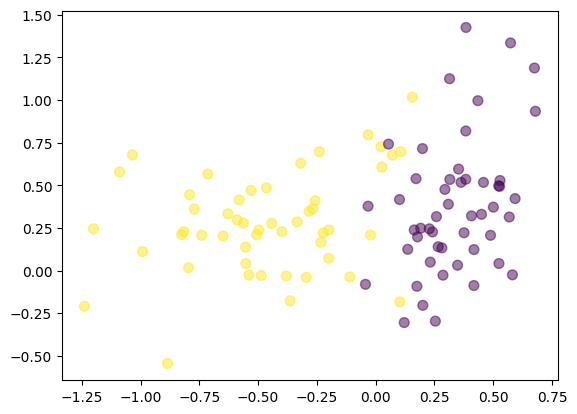

In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X,y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                          n_redundant=0, n_repeated=0, n_classes=2, 
                          n_clusters_per_class=1, class_sep=0.35, 
                          random_state=1)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, s=50)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.3, shuffle=True, random_state=1)
nn = nearest_neighbor()
nn.fit(X_train, y_train)
y_pred = np.array([nn.predict(X_test[i]) for i in range(len(X_test))])

np.sum(y_pred == y_test)/len(y_test)

To add the noise features to the feature matrix we will use the NumPy [hstack](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html) method.  For example to add two noise features:

In [6]:
num_noise = 2
X_train_noise = np.hstack((X_train, 
                           rng.normal(0, 0.5, size=(len(X_train),num_noise))))
X_test_noise = np.hstack((X_test, 
                          rng.normal(0, 0.5, size=(len(X_test),num_noise)))) 

Now the data has four dimensions:

In [7]:
X_train_noise.shape, X_test_noise.shape

((70, 4), (30, 4))

In your code, add noise features to the dataset, as described above, where the number of noise features increases from 2 to 32, using the values `[2, 4, 8, 16, 32]`.  Plot the accuracy of the classifier on test data as a function of the number of noise features. 

Text(0.5, 1.0, 'Accuracy of nearest neighbor as noise increases')

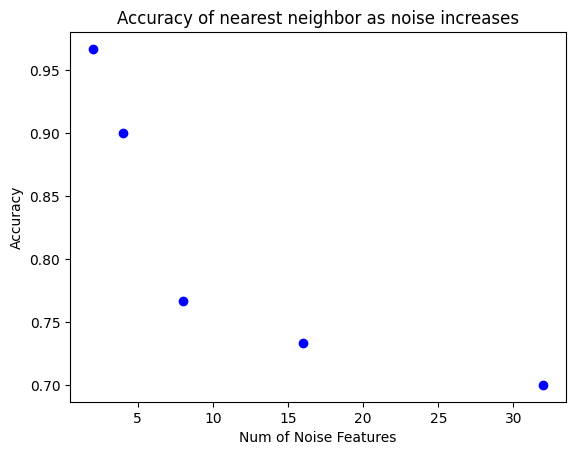

In [19]:
# your code here
import matplotlib.pyplot as plt

noise_list = [2,4,8,16,32]
accuracy_list = []

for i in noise_list:
    X_train_noise = np.hstack((X_train, rng.normal(0,0.5,size=(len(X_train), i))))
    X_test_noise = np.hstack((X_test, rng.normal(0,0.5, size=(len(X_test), i))))
    
    nn = nearest_neighbor()
    nn.fit(X_train_noise, y_train)
    y_pred = np.array([nn.predict(X_test_noise[i]) for i in range(len(X_test_noise))])

    accuracy_list.append(np.sum(y_pred == y_test)/len(y_test))
    
plt.plot(noise_list, accuracy_list, 'ob')
plt.xlabel("Num of Noise Features")
plt.ylabel("Accuracy")
plt.title("Accuracy of nearest neighbor as noise increases")

### Exercise:  a faster NumPy implementation

Whereas our rudimentary implementation of the nearest neighbor classifier takes in a single vector as input, the nearest neighbor implementation in scikit-learn takes a matrix of test examples.
Furthermore, our implementation requires two for loops:  one in `get_nearest`, and another for looping over the test examples.
In this exercise, extend our naive implementation of the nearest neighbor classifier and improve its efficiency by eliminating the for loop in the `get_nearest` method.  Finally, compare the running time of your implementation with our naive implementation (recall that `%timeit` can be used to time the execution of a statement).

In [9]:
class fast_nearest_neighbor:
    def __init__(self):
        pass
    def fit(self, X, y):
        self.X = X
        self.y = y
    def predict(self, X_test) :
        """
        make nearest neighbor predictions for a two dimensional array 
        X_test, representing a test set.
        The number of columns of X_test needs to be the same as the 
        number of columns of the training data.
        
        return:  an array of predictions for X_test
        """
        y_pred = []
        
        for x in X_test:
            distances = np.linalg.norm(self.X - x, axis=1)
            min_distance = np.argmin(distances)
            y_pred.append(self.y[min_distance])
        
        return y_pred
    

**Comment:**  Just because your implementation contains fewer for loops doesn't mean it's necessarily faster.  For example, scipy has a method called `cdist` that computes all pairwise distances between two matrices, which is exactly what we need here.  However, their implementation performs those for loops in Python, which would make such an implementation slower than what we had created here.  So need I say, do not use that function?

In [10]:
%%timeit

fn = fast_nearest_neighbor()
fn.fit(X_train, y_train)
y_pred = np.array(fn.predict(X_test))

143 µs ± 938 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [12]:
%%timeit

nn = nearest_neighbor()
nn.fit(X_train, y_train)
y_pred = np.array([nn.predict(X_test[i]) for i in range(len(X_test))])

3.23 ms ± 25.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**For this part, I changed the nearest_neighbor fuction so that it accepts a matrix instead of a value and eliminated the for loop for calculating distances. The first for loop for iterating over every value in X_test is still there as the directions say to eliminate only the for loop in get_nearest. Above, you can see the difference in time between the two methods. The new, faster method is 25x faster the older involving two for loops.**